# Simulating fibre-reinforced materials

In this notebook, the response of a fibre-reinforced neo-Hookean material to force-controlled compression will be simulated.  The response will be compared to that of a purely neo-Hookean material.

In [1]:
import ucompress as uc
import matplotlib.pyplot as plt

The parameter values for this problem are contained in the `FibreReinforcedNH` class in the `example_parameters` module.  The parameters values in this class are non-dimensional.  The shear modulus of the fibres is assumed to be 100 times that of the neo-Hookean matrix.  Moreover, the ratio of fibres to matrix (by volume) is taken to be 50:50.

A deformation-dependent permeability law is used.  This is given by the standard Kozeny-Carman law.

In [2]:
# Importing the parameters
pars = uc.parameters.example_parameters.FibreReinforcedNH()

# Defining a dict to store the different mechanical models to simulate
mechanics = {
    "neo-Hookean": uc.mechanics.NeoHookean,
    "Fibre-reinforced NH": uc.mechanics.FibreReinforcedNH
    }

# Defining the permeability
permeability = uc.permeability.KozenyCarman

# Preallocating a dict to store the solutions in
solutions = {}

We now simulate the response of the two materials.

In [3]:
# Loop over the mechanics models
for m in mechanics:
    
    # create the model for the problem
    model = {
        "mechanics": mechanics[m](pars),
        "permeability": permeability(pars)
    }
    
    # create the force-controlled experiments and solve
    problem = uc.experiments.ForceControlled(model, pars)
    solutions[m] = problem.transient_response()

Now we plot the results (which are non-dimensional).

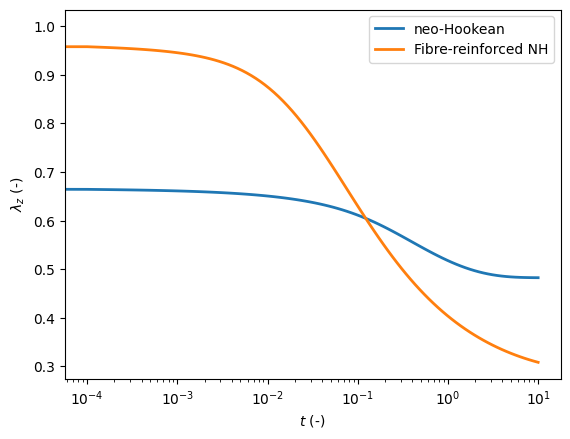

In [4]:
# plot the axial strain
for m in mechanics:
    plt.semilogx(
        solutions[m].t,
        solutions[m].lam_z,
        lw = 2,
        label = m
    )
    
plt.xlabel('$t$ (-)')
plt.ylabel('$\lambda_z$ (-)')
plt.legend()
plt.show()

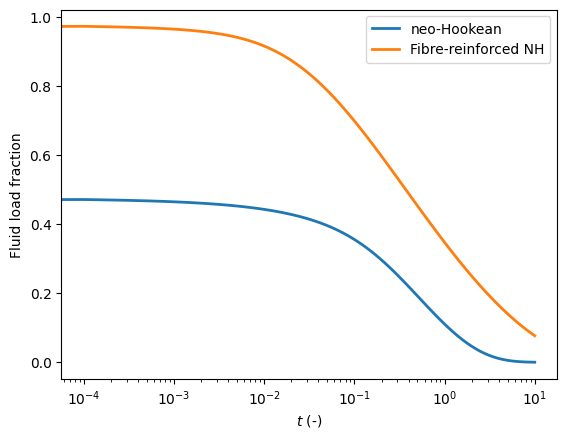

In [5]:
# plot the fluid load fraction
for m in mechanics:
    plt.semilogx(
        solutions[m].t,
        solutions[m].fluid_load_fraction,
        lw = 2,
        label = m
    )
    
plt.xlabel('$t$ (-)')
plt.ylabel('Fluid load fraction')
plt.legend()
plt.show()